In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


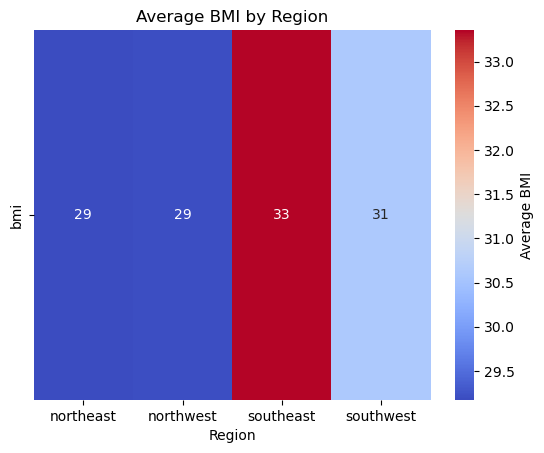

In [6]:
# Create a pivot table for the desired variables (e.g., Gender and Region)
pivot_table = df.pivot_table(values="bmi", columns="region", aggfunc="mean")

# Visualize the pivot table using a heatmap
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': 'Average BMI'})
plt.xlabel("Region")
plt.title("Average BMI by Region")
plt.show()

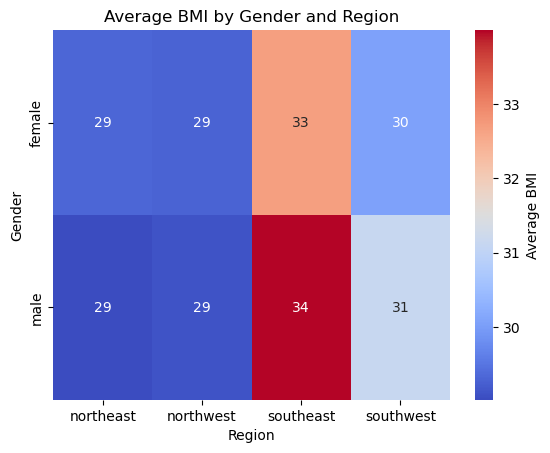

In [22]:
# Create a pivot table for the desired variables (e.g., Gender and Region)
pivot_table = df.pivot_table(values="bmi", index="sex", columns="region", aggfunc="mean")

# Visualize the pivot table using a heatmap
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': 'Average BMI'})
plt.xlabel("Region")
plt.ylabel("Gender")
plt.title("Average BMI by Gender and Region")
plt.show()


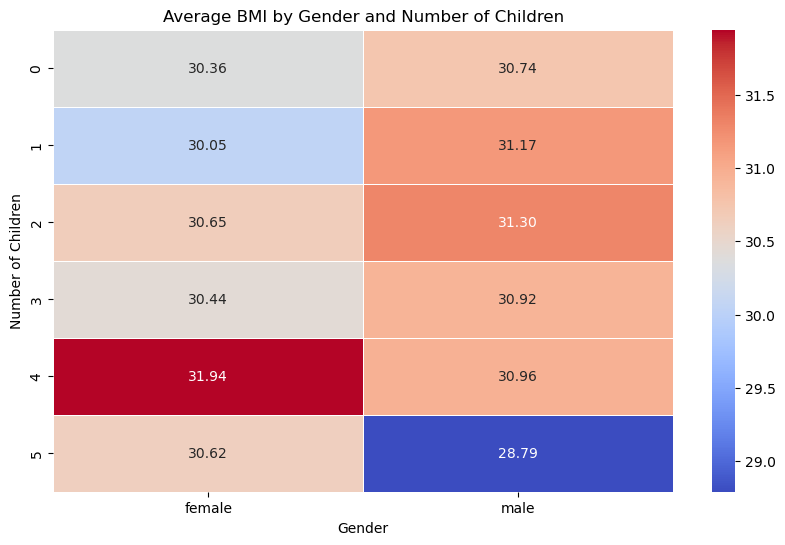

In [38]:
grouped_data = df.groupby(['sex', 'children'])['bmi'].mean().reset_index()
pivot_data = grouped_data.pivot_table(values='bmi', index='children', columns='sex')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Average BMI by Gender and Number of Children')
plt.xlabel('Gender')
plt.ylabel('Number of Children')
plt.show()


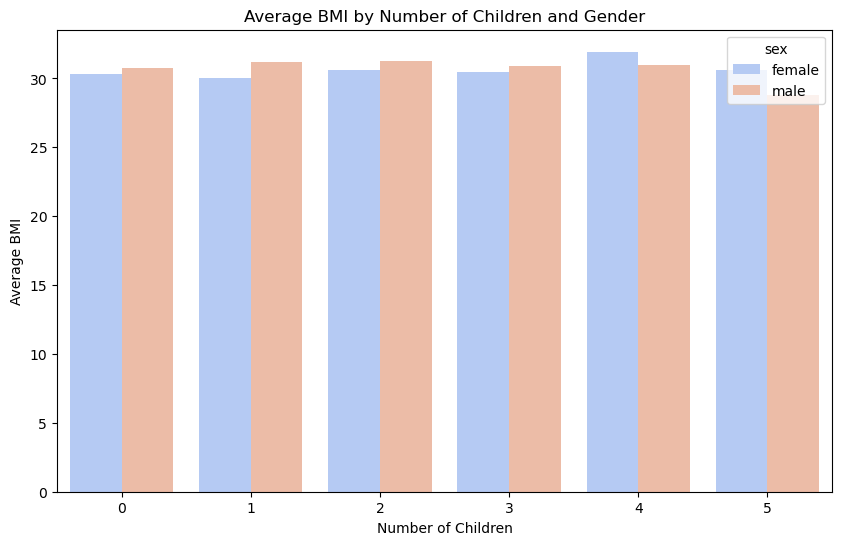

In [43]:
grouped_data = df.groupby(['sex', 'children'])['bmi'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='children', y='bmi', hue='sex', palette='coolwarm')
plt.xlabel('Number of Children')
plt.ylabel('Average BMI')
plt.title('Average BMI by Number of Children and Gender')
plt.show()



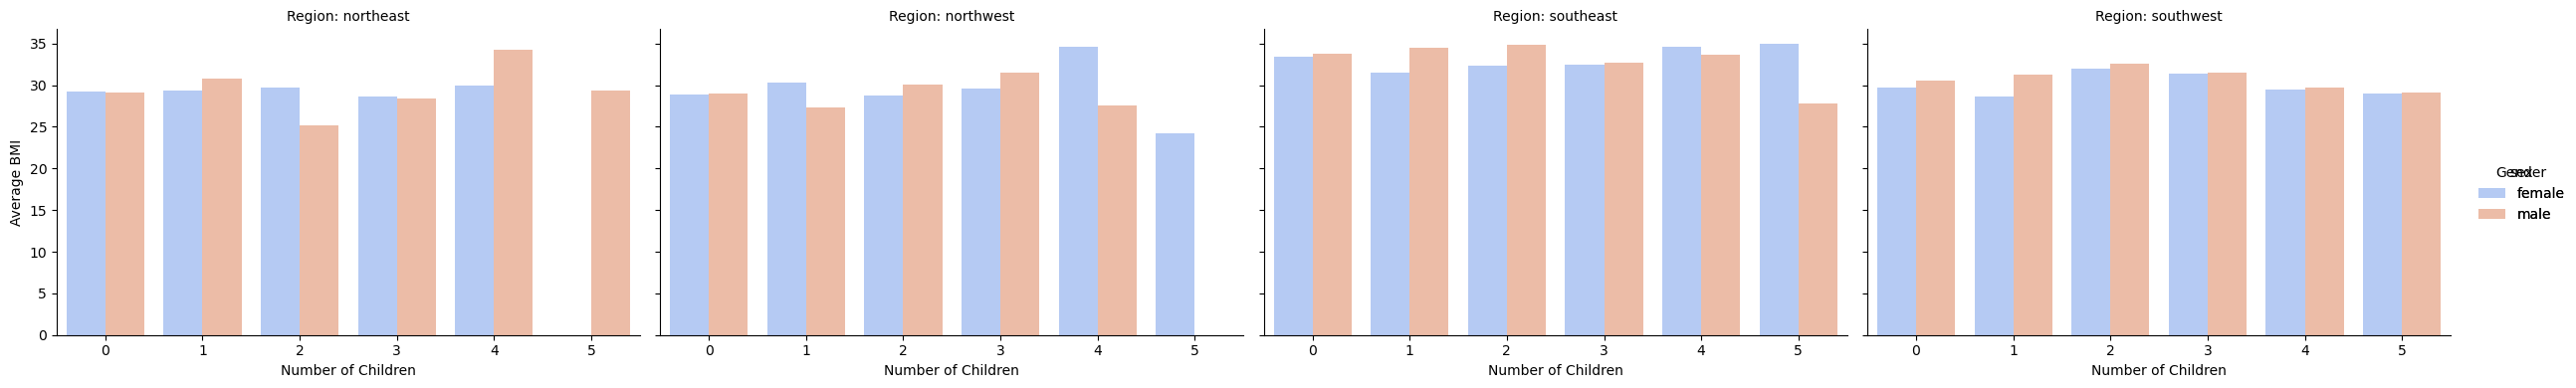

In [44]:
grouped_data = df.groupby(['sex', 'children', 'region'])['bmi'].mean().reset_index()

g = sns.catplot(
    data=grouped_data,
    x='children',
    y='bmi',
    hue='sex',
    col='region',
    kind='bar',
    height=4,
    aspect=1.5,
    palette='coolwarm',
)

g.set_axis_labels('Number of Children', 'Average BMI')
g.set_titles('Region: {col_name}')
g.add_legend(title='Gender')
plt.show()


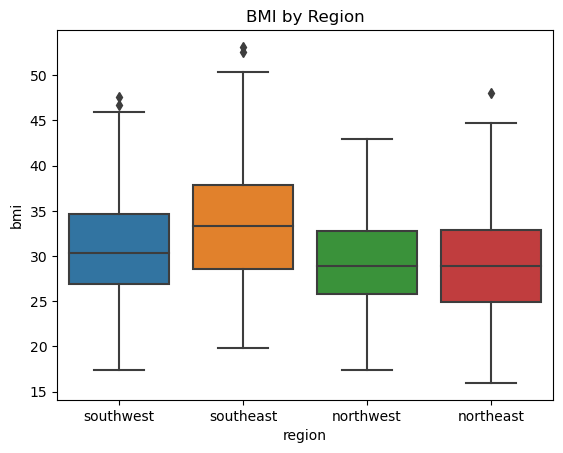

In [23]:
sns.boxplot(data=df, x="region", y="bmi")
plt.xlabel("region")
plt.ylabel("bmi")
plt.title("BMI by Region")
plt.show()


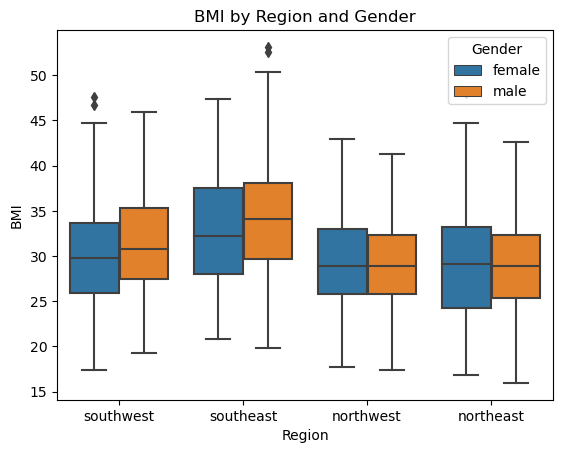

In [24]:
sns.boxplot(data=df, x="region", y="bmi", hue="sex")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.title("BMI by Region and Gender")
plt.legend(title="Gender")
plt.show()


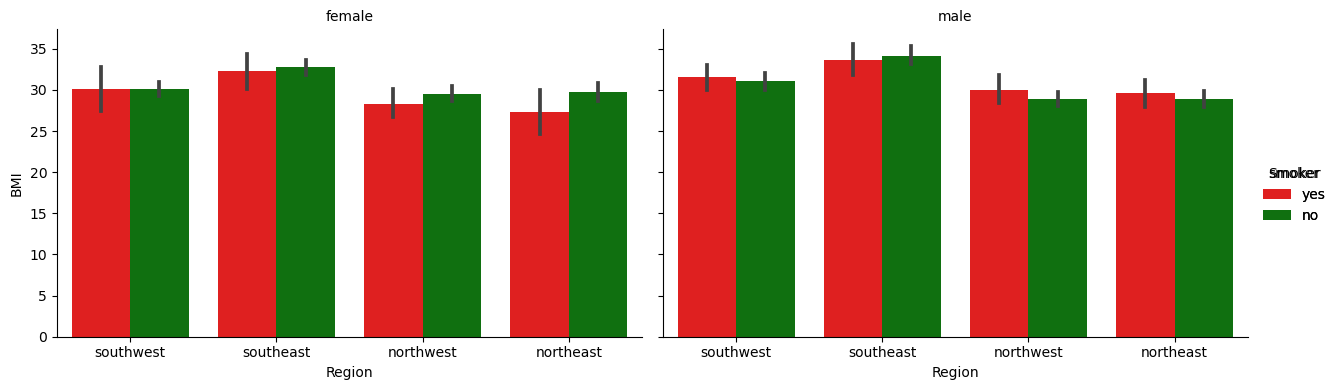

In [45]:
#BMI by region and gender broken down by smoking status
#For women, smoking correlates with a lower BMI.  Not for men.

g = sns.catplot(
    data=df,
    x="region",
    y="bmi",
    hue="smoker",
    col="sex",
    kind="bar",
    height=4,
    aspect=1.5,
    palette={"yes": "r", "no": "g"},
)

g.set_axis_labels("Region", "BMI")
g.set_titles("{col_name}")
g.add_legend(title="Smoker")
plt.show()


In [7]:
##Added a column turning the presence of children into a binary status (yes or no).

df['has_children'] = df['children'].apply(lambda x: 'yes' if x > 0 else 'no')
df

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,yes
1334,18,female,31.920,0,no,northeast,2205.98080,no
1335,18,female,36.850,0,no,southeast,1629.83350,no
1336,21,female,25.800,0,no,southwest,2007.94500,no


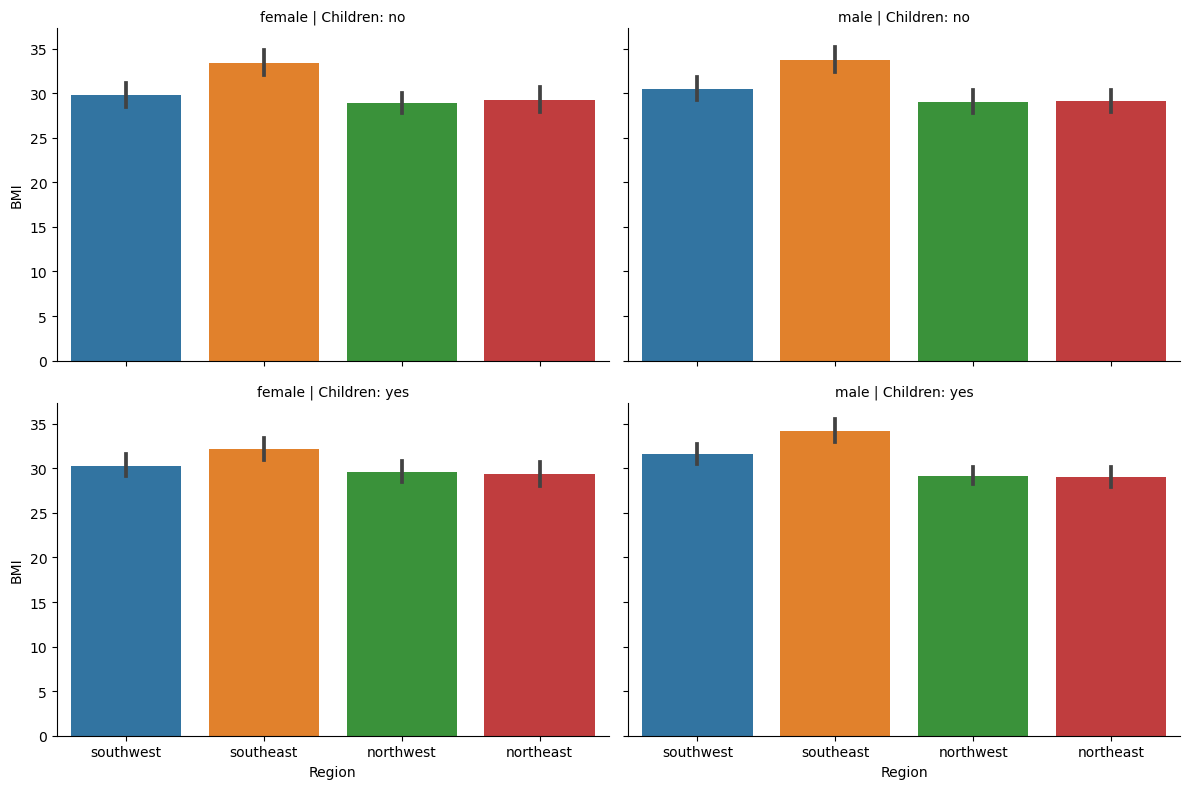

In [46]:
g = sns.catplot(
    data=df,
    x='region',
    y='bmi',
    col='sex',
    row='has_children',
    kind='bar',
    height=4,
    aspect=1.5,
)

g.set_axis_labels('Region', 'BMI')
g.set_titles('{col_name} | Children: {row_name}')
plt.show()


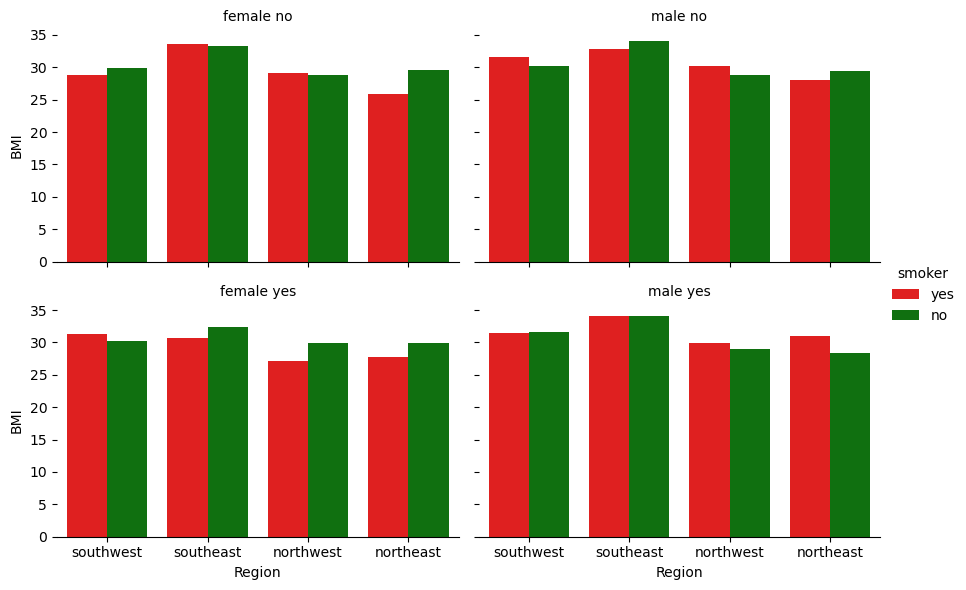

In [8]:
g = sns.catplot(
    data=df,
    x="region",
    y="bmi",
    hue="smoker",
    col="sex",
    row="has_children",
    kind="bar",
    errorbar=None,
    height=3,
    aspect=1.5,
    palette={"yes": "r", "no": "g"},
)

g.set_axis_labels("Region", "BMI")
g.set_titles("{col_name} {row_name}")
g.despine(left=True)
plt.show()

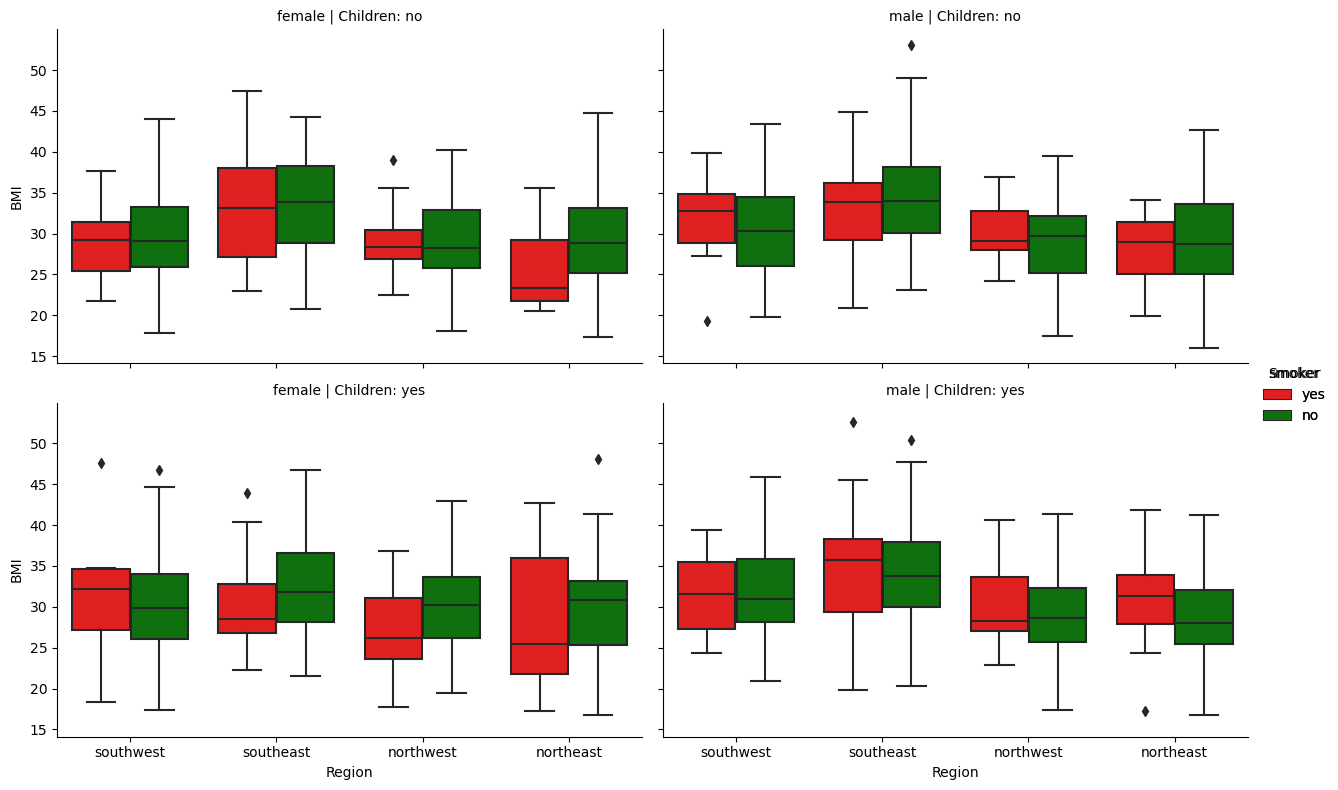

In [28]:
g = sns.catplot(
    data=df,
    x='region',
    y='bmi',
    hue='smoker',
    col='sex',
    row='has_children',
    kind='box',
    height=4,
    aspect=1.5,
    palette={'yes': 'r', 'no': 'g'},
)

g.set_axis_labels('Region', 'BMI')
g.set_titles('{col_name} | Children: {row_name}')
g.add_legend(title='Smoker')
plt.show()


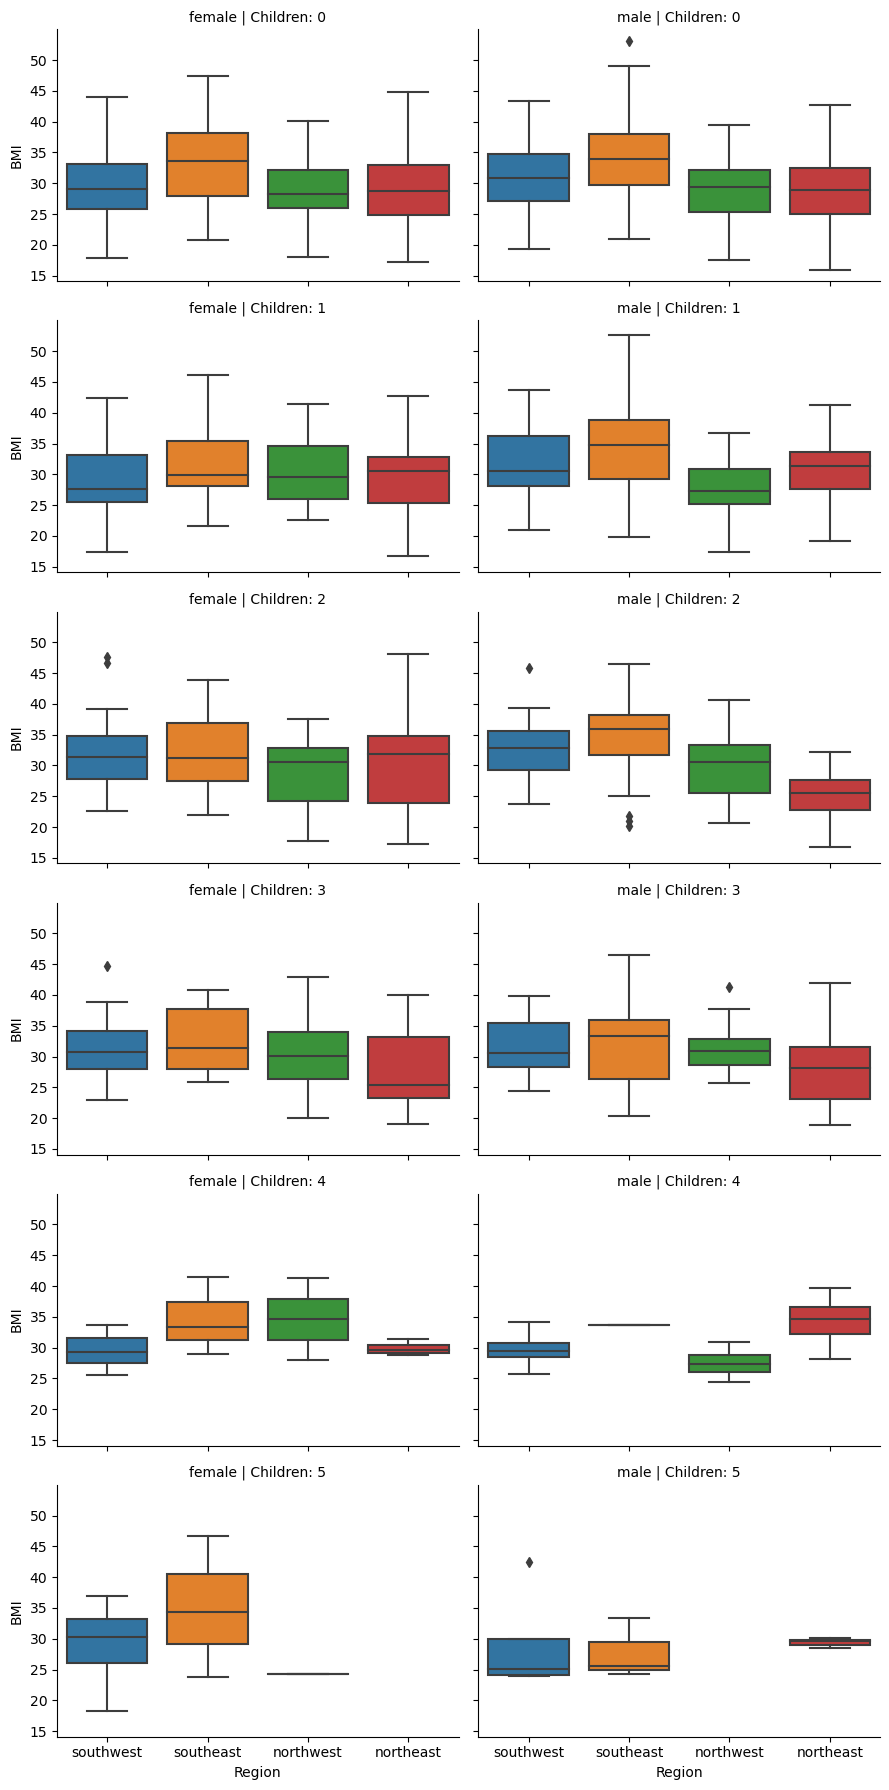

In [35]:
g = sns.catplot(
    data=df,
    x='region',
    y='bmi',
    col='sex',
    row='children',
    kind='box',
    height=3,
    aspect=1.5,
)

g.set_axis_labels('Region', 'BMI')
g.set_titles('{col_name} | Children: {row_name}')
plt.show()


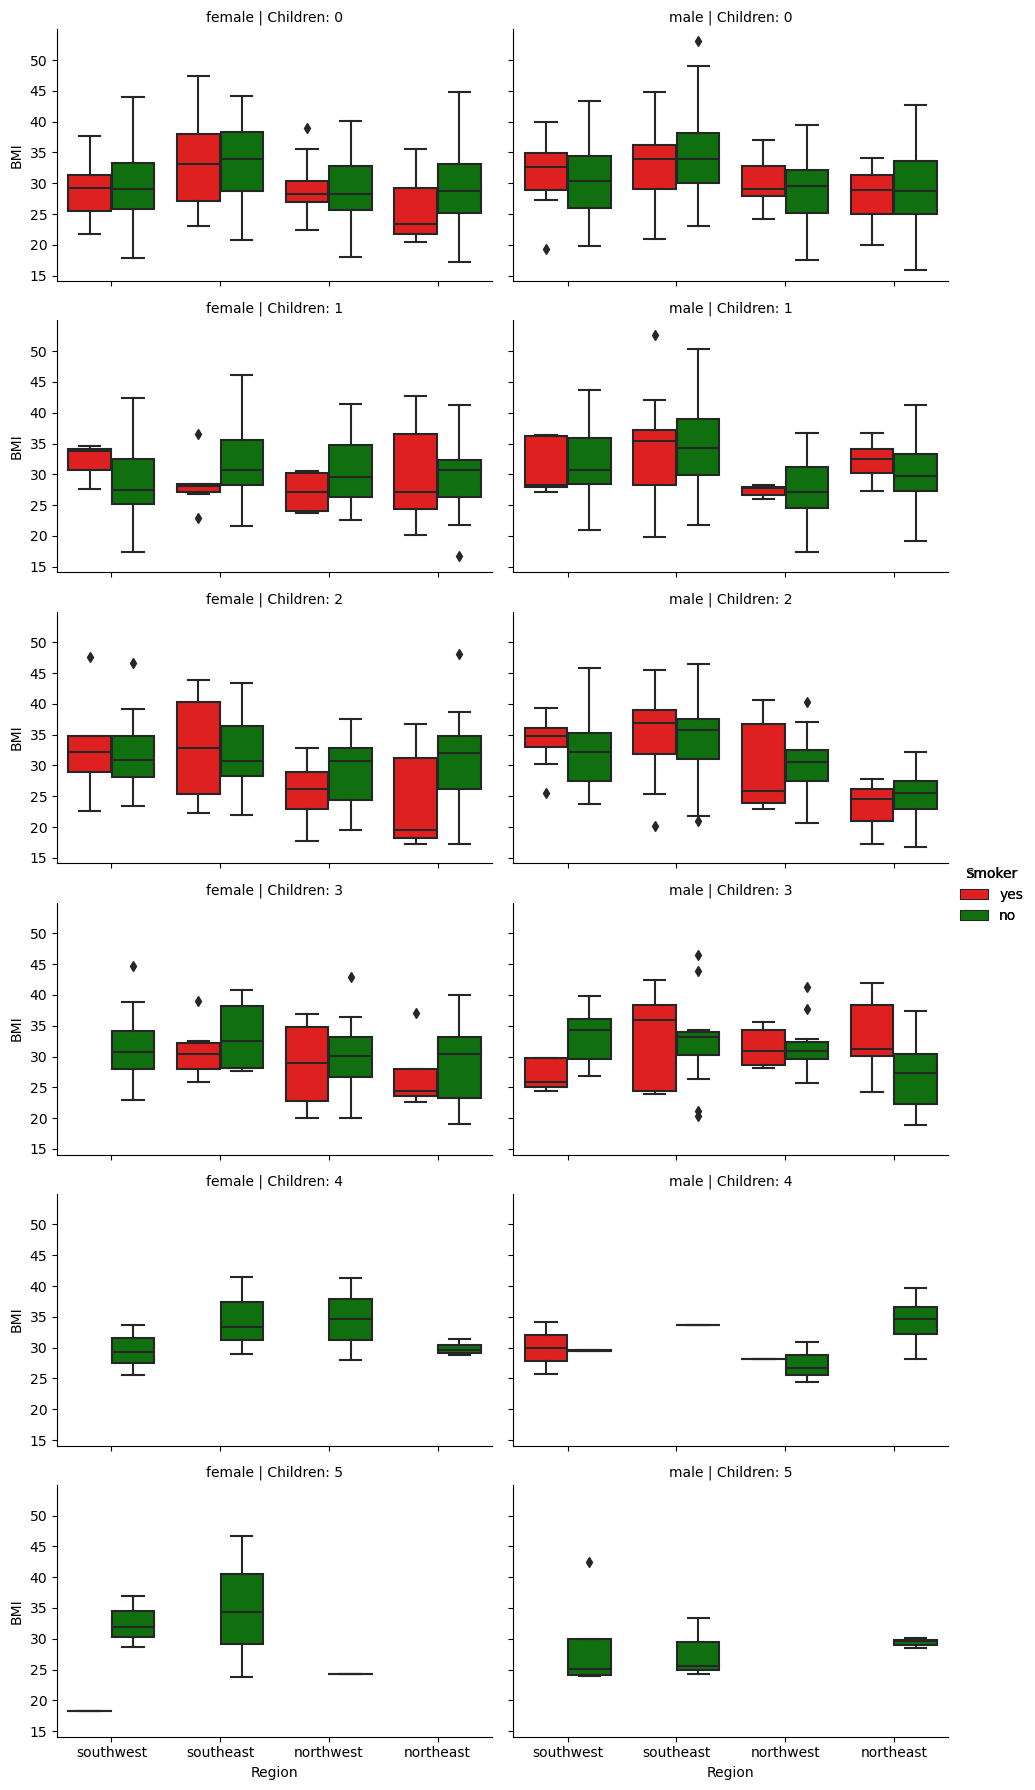

In [30]:
g = sns.catplot(
    data=df,
    x="region",
    y="bmi",
    hue="smoker",
    col="sex",
    row="children",
    kind="box",
    height=3,
    aspect=1.5,
    palette={"yes": "r", "no": "g"},
)

g.set_axis_labels("Region", "BMI")
g.set_titles("{col_name} | Children: {row_name}")
g.add_legend(title="Smoker")
plt.show()


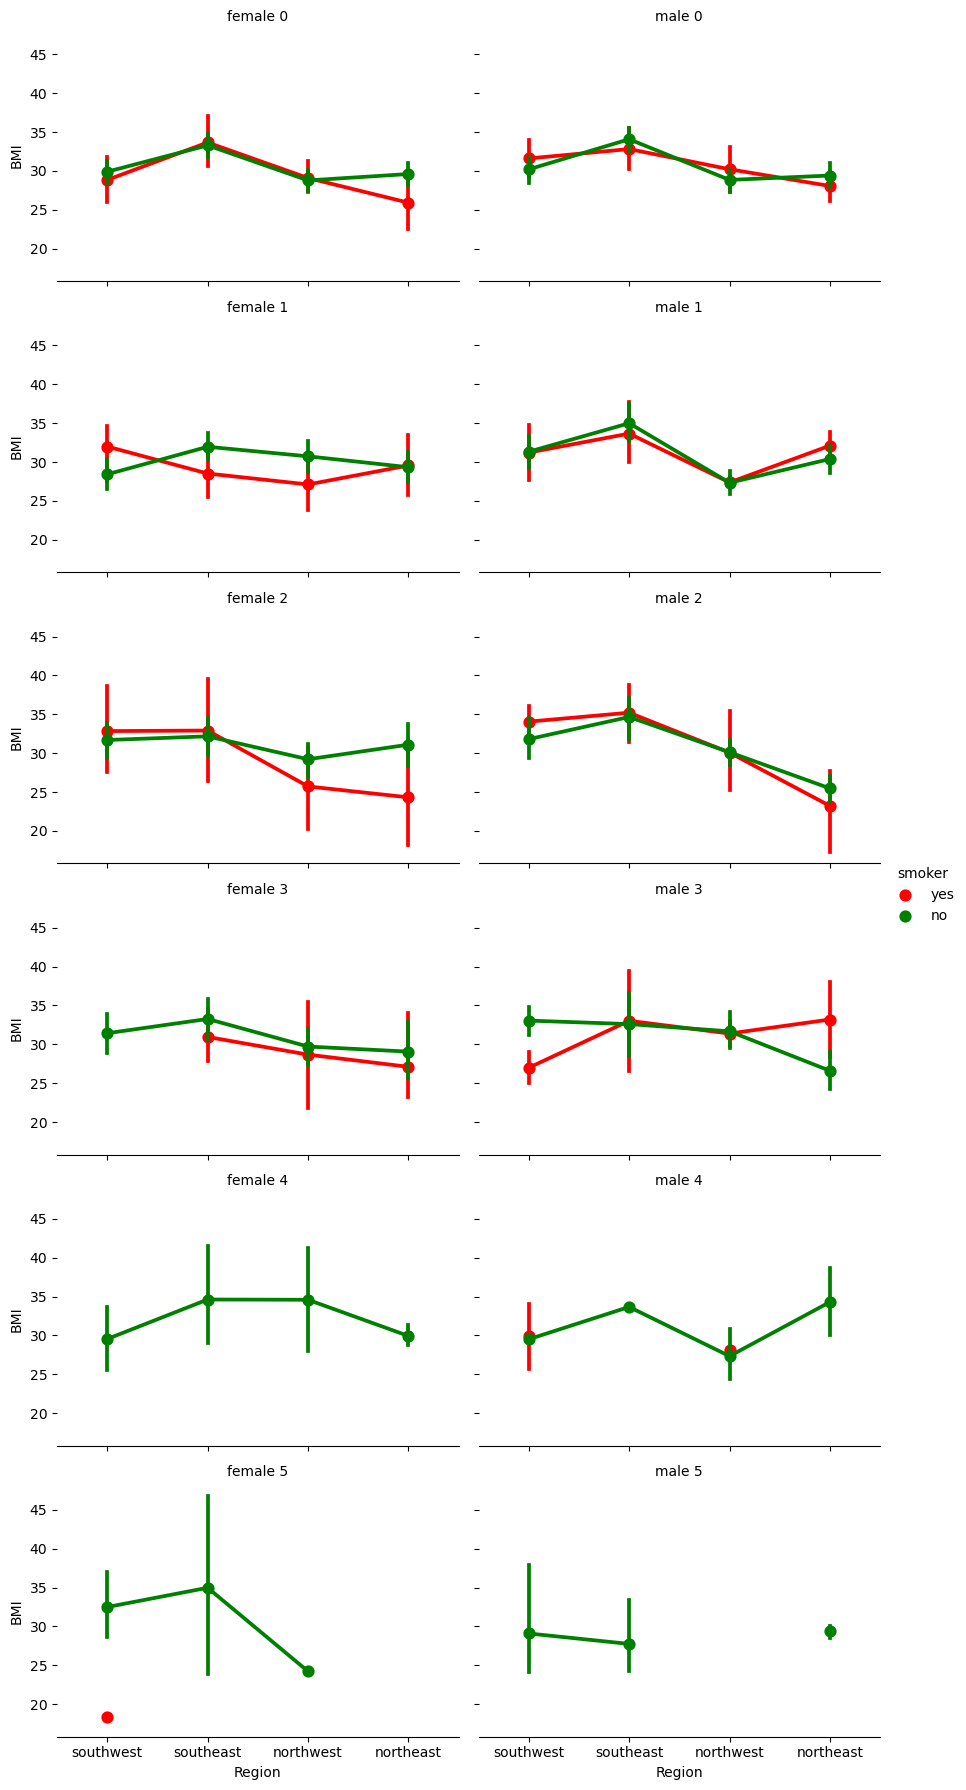

In [9]:
g = sns.catplot(
    data=df,
    x="region",
    y="bmi",
    hue="smoker",
    col="sex",
    row="children",
    kind="point",
    errorbar=('ci', 95),
    height=3,
    aspect=1.5,
    palette={"yes": "r", "no": "g"},
)

g.set_axis_labels("Region", "BMI")
g.set_titles("{col_name} {row_name}")
g.despine(left=True)
plt.show()
